In [50]:
using Symbolics

In [51]:
using LinearAlgebra
using Plots

In [52]:
x = [0.0; 0.1; 0.2; 0.3; 0.4; 0.5; 0.6; 0.7; 0.8; 0.9; 1.0]
y = [0.6761488864859304; 0.6345697680852508; 0.6396283580587062; 0.6132010027973919;
0.5906142598705267; 0.5718728461471725; 0.5524549902830562; 0.538938885654085;
0.5373495476994958; 0.514904589752926; 0.49243437874655027]

11-element Vector{Float64}:
 0.6761488864859304
 0.6345697680852508
 0.6396283580587062
 0.6132010027973919
 0.5906142598705267
 0.5718728461471725
 0.5524549902830562
 0.538938885654085
 0.5373495476994958
 0.514904589752926
 0.49243437874655027

In [28]:
@variables a b x y
f = (a/(x + b) - y)^2
G = Symbolics.gradient(f, [a; b])

2-element Vector{Num}:
          ((2a) / (b + x) - 2y) / (b + x)
 -(a / ((b + x)^2))*((2a) / (b + x) - 2y)

In [29]:
simplify(G[1])

(2a - 2b*y - 2x*y) / ((b + x)^2)

In [30]:
simplify(G[2])

(a*(2b*y + 2x*y - 2a)) / ((b + x)^3)

In [32]:
H = Symbolics.hessian(f, [a; b])

2×2 Matrix{Num}:
                                                          2 / ((b + x)^2)  …                     (2y + (-2a) / (b + x)) / ((b + x)^2) + (-((2a) / ((b + x)^2))) / (b + x)
 (2y + (-2a) / (b + x)) / ((b + x)^2) + (-((2a) / ((b + x)^2))) / (b + x)     (a*((2a) / ((b + x)^2))) / ((b + x)^2) - (a / ((b + x)^4))*(2b + 2x)*(2y + (-2a) / (b + x))

In [33]:
simplify(H[1, 1])

2 / ((b + x)^2)

In [34]:
simplify(H[1, 2])

(2.0b*y + 2.0x*y - 4.0a) / ((b + x)^3)

In [35]:
simplify(H[2, 1])

(2.0b*y + 2.0x*y - 4.0a) / ((b + x)^3)

In [36]:
simplify(H[2, 2])

(6.0(a^2) - 4.0a*b*y - 4.0a*x*y) / ((b + x)^4)

In [53]:
ab = [1,1]
iteration  =  0
J = zeros(2,2)
F = zeros(2)
while iteration<=100
    G_1, G_2, H_11, H_12, H_21, H_22 = 0,0,0,0,0,0
    for i in 1:length(x)
        G_1 += (2*ab[1] - 2*ab[2] * y[i] - 2*x[i]*y[i]) / (ab[2]+x[i])^2
        G_2 += ab[1] * (-2*ab[1] + 2*ab[2]*y[i] + 2*x[i]*y[i]) / (ab[2]+x[i])^3
        H_11 += 2 / (ab[2] +x[i])^2
        H_12 += (-4*ab[1] + 2*ab[2] * y[i] + 2*x[i] * y[i]) / (ab[2] + x[i])^3
        H_21 += (-4*ab[1] + 2*ab[2] * y[i] + 2*x[i] * y[i]) / (ab[2] + x[i])^3
        H_22 += (6*ab[1]^2 - 4*ab[1] * ab[2] * y[i] - 4*ab[1] * x[i] * y[i]) / (ab[2] + x[i])^4
    end
    F[1], F[2] = G_1, G_2
    J[1,1], J[1,2], J[2,1], J[2,2] = H_11, H_12, H_21, H_22
    ab = ab - inv(J)*F
    iteration += 1
end
ab

2-element Vector{Float64}:
 1.948265048323992
 2.898105977748503

In [54]:
M = zeros(0)
l = []
for e in x
    f = ab[1]/(ab[2]+e)
    append!(l,f)
end
l

11-element Vector{Any}:
 0.6722545908543935
 0.6498319481645164
 0.6288568119738309
 0.609193398179878
 0.5907223908111048
 0.5733385188930634
 0.556948548933889
 0.5414696121716541
 0.5268278032178362
 0.5129570000779475
 0.4997978657956563

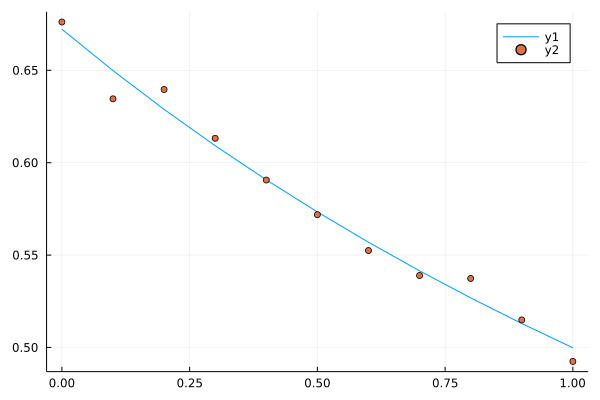

In [65]:
Plots.plot(x,l)
Plots.scatter!(x,y)